In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme()

In [ ]:
df = (
    pd.read_html("data/2022-11-12_2023-11-30.html", header=0)[0]
    .drop(columns=["Cuenta.1", "Moneda", "MXN"])
    .rename(
        columns={
            "Ingreso/Gasto": "type",
            "Categoría": "category",
            "Subcategorías": "subcategory",
            "Fecha": "date",
            "Cuenta": "account",
            "Nota": "note",
            "Nota.1": "description",
            "Importe": "import",
        }
    )
    .assign(
        date=lambda df_: pd.to_datetime(
            df_["date"].where(
                lambda s: s.str.contains(" "), df_["date"].add(" 00:00:00")
            ),
            format="%d/%m/%Y %H:%M:%S",
        ),
        type=lambda df_: pd.Categorical(df_["type"]),
        category=lambda df_: pd.Categorical(df_["category"]),
        subcategory=lambda df_: pd.Categorical(df_["subcategory"]),
        account=lambda df_: pd.Categorical(df_["account"]),
        note=lambda df_: df_["note"].astype("string"),
        description=lambda df_: df_["description"].astype("string"),
    )
    .set_index("date")
)
df.info()

In [39]:
df = pd.read_parquet("data/2022-11-12_2023-11-30.parquet")
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 810 entries, 2023-11-20 15:09:24 to 2022-11-14 06:59:34
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   account      810 non-null    category
 1   category     810 non-null    category
 2   subcategory  528 non-null    category
 3   note         809 non-null    string  
 4   type         810 non-null    category
 5   description  297 non-null    string  
 6   import       810 non-null    float64 
dtypes: category(4), float64(1), string(2)
memory usage: 31.6 KB


<Axes: ylabel='category'>

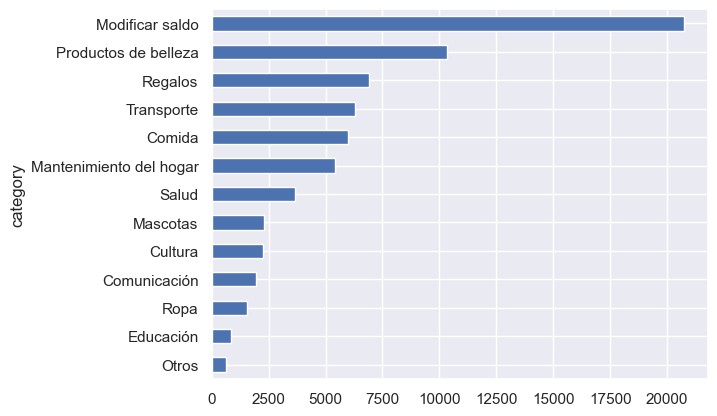

In [40]:
(
    df.loc[lambda df_: df_["type"] == "Gasto"]
    .groupby("category", observed=True)["import"]
    .sum()
    .sort_values()
    .plot.barh()
)